# Exercise 10 - Solutions

### 1: Coding of variables
#### a) Understanding Codings

A correct coding has to respect the order of the ordinal elements and be complete in the sense that it has a mapping for all ordinal values. Thus (i) and (iii) are codings of the given ordinal values.  

#### b) A simple coding function

In [1]:
def simple_coding(series):
    
    """
    This function creates a simple coding for an ordinal input series.
    
    Parameters
    ----------
        series : pandas.Series
            The input series to be encoded
    
    Returns
    -------
            The encoded input sequence
    """
    
    # extract vlaues of categorical variable
    values = series.dtype.categories
    
    # create a dictionary with keys=ordinal values and values=coding
    dict = {a:i+1 for i,a in enumerate(values)}
    
    # encode & return the series
    return series.replace(dict)


Let's read in the dataset provided in the exercise to test our simple function.

In [2]:
import pandas as pd
url = "https://stats.idre.ucla.edu/stat/data/ologit.dta"
data_student = pd.read_stata(url)
data_student.head()


,apply,pared,public,gpa
0,very likely,0,0,3.26
1,somewhat likely,1,0,3.21
2,unlikely,1,1,3.94
3,somewhat likely,0,0,2.81
4,somewhat likely,0,0,2.53


Test the function:

In [3]:
simple_coding(data_student['apply'])

0      3
1      2
2      1
3      2
4      2
      ..
395    1
396    1
397    2
398    2
399    3
Name: apply, Length: 400, dtype: int64

#### c) A coding function

Given the way we structured the `simple_coding` function, only very minor changes are required. Notice that the default argument implements the mapping used in the `simple_coding` function.

In [4]:
def coding(series, f = lambda x: x):
    
    """
    This function creates a simple coding for an ordinal input series based on the coding defined by function `f`.
    
    Parameters
    ----------
        series : pandas.Series
            The input series to be encoded.
        f : function
            A coding function that defines the encoding.
    
    Returns
    -------
            The encoded input sequence
    """
    
    # extract vlaues of categorical variable
    values = series.dtype.categories
    
    # create a dictionary with keys=ordinal values and values=coding
    dict_ = {a : f(i+1) for i,a in enumerate(values)}
    
    # encode & return the series
    return series.replace(dict_)


Let's again test the function on the provided data using `x**2`:

In [5]:
coding(data_student['apply'], lambda x: x**2)

0      9
1      4
2      1
3      4
4      4
      ..
395    1
396    1
397    4
398    4
399    9
Name: apply, Length: 400, dtype: int64

Finally, let's test using `np.log`:

In [6]:
import numpy as np
coding(data_student["apply"], np.log).array

<PandasArray>
[1.0986122886681098, 0.6931471805599453,                0.0,
 0.6931471805599453, 0.6931471805599453,                0.0,
 0.6931471805599453, 0.6931471805599453,                0.0,
 0.6931471805599453,
 ...
                0.0, 0.6931471805599453, 1.0986122886681098,
 0.6931471805599453, 0.6931471805599453,                0.0,
                0.0, 0.6931471805599453, 0.6931471805599453,
 1.0986122886681098]
Length: 400, dtype: float64

#### d) Applications
Let's start with the student dataset:

##### Student dataset
###### (i)

In [7]:
coding(data_student['apply'])

0      3
1      2
2      1
3      2
4      2
      ..
395    1
396    1
397    2
398    2
399    3
Name: apply, Length: 400, dtype: int64

###### (ii)

In [8]:
coding(data_student['apply'], lambda x: x**2)

0      9
1      4
2      1
3      4
4      4
      ..
395    1
396    1
397    4
398    4
399    9
Name: apply, Length: 400, dtype: int64

###### (iii) 

The lambda function for this purpose can be written as:

In [9]:
g = lambda x: 1 if x == 1 else (x+1 if x>1 else None)

It returns $1$, if $x$ is $1$, returns $x+1$, if $x>1$ and returns `None` otherwise. 

In [10]:
coding(data_student['apply'], g)

0      4
1      3
2      1
3      3
4      3
      ..
395    1
396    1
397    3
398    3
399    4
Name: apply, Length: 400, dtype: int64

##### Global Warming Data


In [11]:
import pyreadr, os, pathlib

def pyreadr_load(url, local_file = "temp_pyreadr.rda"):
    """
    Download the R dataset at the specified url into local_file, load the 
    local file, delete the local file. Return the dataset.
    """
  
    file_name = pyreadr.download_file(url, local_file)
    dataframe = pyreadr.read_r(file_name)
    os.remove(str(pathlib.Path().resolve()) + "/" + file_name)
    name = next(iter(dataframe.items()))[0]
    return dataframe[name]

Load the data.

In [12]:
url = 'https://github.com/cardiomoon/processR/blob/master/data/glbwarm.rda?raw=true'
glbwarm = pyreadr_load(url)
glbwarm.head()

,govact,posemot,negemot,ideology,age,sex,partyid
0,7.0,1.00,6.0,3.0,34.0,0.0,2.0
1,6.0,5.00,6.0,4.0,50.0,1.0,2.0
2,5.2,2.00,6.0,5.0,50.0,0.0,2.0
3,6.0,4.33,6.0,4.0,71.0,1.0,1.0
4,7.0,3.00,6.0,1.0,40.0,0.0,1.0


###### (i)
First, we see that "ideology" is a `float`. We thus have to convert it to categorical first.

In [13]:
glbwarm.ideology.dtype

dtype('float64')

In [14]:
# convert ideology to ordered categorical
glbwarm['ideology'] = pd.Categorical(glbwarm.ideology, ordered=True)

We are now ready to call our function:

In [15]:
coding(glbwarm['ideology'])

0      3
1      4
2      5
3      4
4      1
      ..
810    4
811    7
812    5
813    6
814    7
Name: ideology, Length: 815, dtype: int64

###### (ii)

In [16]:
coding(glbwarm['ideology'], lambda x: x**2)

0       9
1      16
2      25
3      16
4       1
       ..
810    16
811    49
812    25
813    36
814    49
Name: ideology, Length: 815, dtype: int64

###### (iii)

In [17]:
coding(glbwarm['ideology'], g)

0      4
1      5
2      6
3      5
4      1
      ..
810    5
811    8
812    6
813    7
814    8
Name: ideology, Length: 815, dtype: int64

#### e) Another coding function

Given the ability for recursive function calls and the way we set up our function, we can actually plug in the new mapping function directly.

In [18]:
f = lambda i: np.sign(i - np.mean(coding(data_student['apply']))) * (i - np.mean(coding(data_student['apply']))) ** 2

In [19]:
coding(data_student['apply'], f)

0      2.1025
1      0.2025
2     -0.3025
3      0.2025
4      0.2025
        ...  
395   -0.3025
396   -0.3025
397    0.2025
398    0.2025
399    2.1025
Name: apply, Length: 400, dtype: float64

If we want to keep the function slightly more flexible, we can make the following adjustments to our code:

In [20]:
# import signature
from inspect import signature

In [21]:
def coding(series, f = lambda x: x):
    
    """
    This function creates a simple coding for an ordinal input series based on the coding defined by function `f`.
    
    Parameters
    ----------
        series : pandas.Series
            The input series to be encoded.
        f : function
            A coding function that defines the encoding.
    
    Returns
    -------
            The encoded input sequence
    """
    
    # extract vlaues of categorical variable
    values = series.dtype.categories
    
    # create a dictionary with keys=ordinal values and values=coding
    ## check the number of function arguments
    if len(signature(f).parameters) == 1:
        dict_ = {a : f(i+1) for i,a in enumerate(values)}
    else:
        dict_ = {a : f(i+1,series) for i,a in enumerate(values)}
        
    # encode & return the series
    return series.replace(dict_)

Let's again run a quick test:

In [22]:
f = lambda i, s: np.sign(i - np.mean(coding(s))) * (i - np.mean(coding(s))) ** 2

In [23]:
coding(data_student['apply'],f)

0      2.1025
1      0.2025
2     -0.3025
3      0.2025
4      0.2025
        ...  
395   -0.3025
396   -0.3025
397    0.2025
398    0.2025
399    2.1025
Name: apply, Length: 400, dtype: float64

#### f) Applications
For simplicity, let's stick to the student data.
##### 1)

In [24]:
f = lambda i, s: np.sign(i - np.mean(coding(s))) * (i - np.mean(coding(s))) ** 2
coding(data_student['apply'],f)

0      2.1025
1      0.2025
2     -0.3025
3      0.2025
4      0.2025
        ...  
395   -0.3025
396   -0.3025
397    0.2025
398    0.2025
399    2.1025
Name: apply, Length: 400, dtype: float64

##### 2)

In [25]:
from collections import Counter
def f(i, s):
    total = np.cumsum([0] + list(Counter(coding(s)).values()))
    total = total / total[-1]
    values = np.diff(total)
    return values[i-1]

coding(data_student['apply'],f)

0      0.55
1      0.35
2      0.10
3      0.35
4      0.35
       ... 
395    0.10
396    0.10
397    0.35
398    0.35
399    0.55
Name: apply, Length: 400, dtype: float64

##### 3)

In [26]:
from scipy import stats

coding(data_student['apply'],lambda i,s: stats.norm.ppf(f(i,s)))

0      0.125661
1     -0.385320
2     -1.281552
3     -0.385320
4     -0.385320
         ...   
395   -1.281552
396   -1.281552
397   -0.385320
398   -0.385320
399    0.125661
Name: apply, Length: 400, dtype: float64

##### 4)

In [27]:
coding(data_student['apply'],lambda i,s: stats.laplace.ppf(f(i,s)))

0      0.105361
1     -0.356675
2     -1.609438
3     -0.356675
4     -0.356675
         ...   
395   -1.609438
396   -1.609438
397   -0.356675
398   -0.356675
399    0.105361
Name: apply, Length: 400, dtype: float64

#### g) Making `f` more effective [Intermediate Python programming]

In [28]:
class F:
    values = None
  
    def __call__(self, i, s):
        
        # compute values if no values in self
        if self.values is None:
            total = np.cumsum([0] + list(Counter(coding(s)).values()))
            total = total / total[-1]
            
            # store values in class handle
            self.values = np.diff(total)
        
        # return the values from memory 
        return self.values[i-1]

In [29]:
s = data_student['apply']

f = F()
f(2, s)

0.35

### 2: Varying intercepts and slopes

In [30]:
import statsmodels.formula.api as smf

In [31]:
fit = smf.ols("govact ~ negemot + C(partyid)", data = glbwarm).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 govact   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     156.9
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           3.38e-80
Time:                        16:54:16   Log-Likelihood:                -1220.3
No. Observations:                 815   AIC:                             2449.
Df Residuals:                     811   BIC:                             2467.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.2223      0.120     26.781      0.000       2.986       3.458
C(partyid)[T.2.0]    -0.2908      0.097     -2.985      0.003      -0.482      -0.100
C(partyid)[T.3.0]    -0.6082      0.093     -6.537      0.000      -0.791      -0.426
negemot               0.4582      0.026     17.401      0.000       0.406       0.510
==============================================================================
Omnibus:                       11.675   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.971
Skew:                          -0.261   Prob(JB):                      0.00252
Kurtosis:                       3.283   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

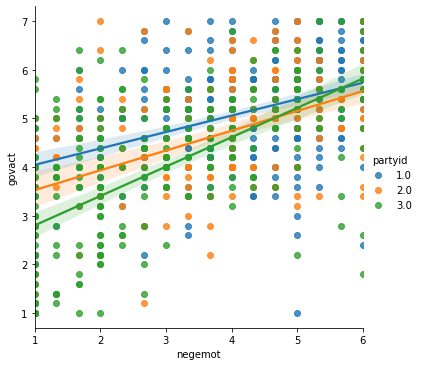

In [32]:
import seaborn as sns
sns.lmplot(x ='negemot', y ='govact', data = glbwarm, hue ='partyid')

In [33]:
import matplotlib.pyplot as plt

In [34]:
def plotter(x,y,data,hue):
    """
    Function to plot a varying intercept model.
    
    Parameters
    ----------
        x : string
            name of the x-variable
        y : string 
            name of the y-variable
        data : dataframe
            dataset
        hue: string
            name of the categorical variable
    
    """
    # compute number of categories
    cats = len(pd.Categorical(data[hue]).categories)
   
    # define the formula of the regression model
    formula=str(y) + " ~ " + str(x) + " + C(" + str(hue) + ")"
    
    # fit the regression model
    fit = smf.ols(formula, data = data).fit()
    
    # generate the intercepts for each category
    aux = np.zeros([cats,1])
    aux[1:] = np.asarray(fit.params[1:cats])[:,None]
    intercepts = np.kron(fit.params[0],np.ones([cats,1])) + aux
    
    # extract the slope coefficient
    beta = np.asarray(fit.params[cats:])
    
    # compute the min and max of the support
    min_ = np.min(data[x])
    max_ = np.max(data[x])
    
    # generate x and y for the regression lines
    xx = np.linspace(min_,max_,100)
    yy = np.zeros([cats,100])
    yy = yy + intercepts + xx*beta
    
    # create figure handles
    fig, ax = plt.subplots()
    
    # plot scatterplot for every category
    for i in pd.Categorical(data[hue]).categories:
        data.loc[data[hue]==i,x]
        ax.scatter(data.loc[data[hue]==i,x],data.loc[data[hue]==i,y],label=hue + ": "+ str(i))
        ax.legend(bbox_to_anchor=(1.02, 1))
        
    # plot the regression lines for each category
    ax.plot(xx,yy.T)
    
    # add axis labels
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    

We can now test our function.

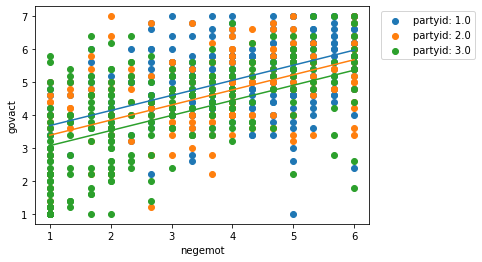

In [35]:
plotter('negemot','govact',glbwarm,'partyid')
